# Data Usage for my phone
## Problem statement:
My phone has been consuming data at a rather abnormal rate i will like to know the what i am using those data for
- Determine which app consumes data the most.
- What do i use most of my data for.
- Proffer a solution to the problem.

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_excel("C:\\Users\\OWNER\\Desktop\\Data science\\datausage.xlsx", "Sheet1")

In [33]:
data

,Application,Month,Data usage,Screen time,Size,Usage Type,normalized_usage,normalized_time,New_size,Usage_type
0,Hotspot,August,5010,120,small,Learning & Research,0.086934,0.032547,2,5
1,Boomplay,August,251,30,big,Music,0.004355,0.008137,0,6
2,Whatsapp,August,4500,240,medium,Fun & Information,0.078084,0.065094,1,4
3,Telegram,August,3500,180,medium,Crypto,0.060732,0.048820,1,1
4,Chrome,August,1090,150,small,Learning & Research,0.018914,0.040683,2,5
...,...,...,...,...,...,...,...,...,...,...
71,Google play service,May,30,20,small,Dowload,0.000521,0.005424,2,2
72,Uprock earning,May,51,15,small,Crypto,0.000885,0.004068,2,1
73,Google Go,May,29,11,small,Learning & Research,0.000503,0.002983,2,5
74,Lite,May,31,30,medium,Fun & Information,0.000538,0.008137,1,4


In [2]:
data.dropna(axis = 1, inplace = True)

In [3]:
score = []
data.shape

(76, 6)

In [4]:
data.describe()

,Data usage,Screen time
count,76.000000,76.000000
mean,758.289474,48.513158
std,1555.025717,72.977895
min,29.000000,5.000000
25%,73.500000,10.000000
50%,167.000000,20.000000
75%,436.000000,30.000000
max,6950.000000,320.000000


In [5]:
data['Application'].value_counts()

Application
Hotspot                4
Bybit                  4
Whatsapp               4
Telegram               4
Chrome                 4
Googleplay             4
Mises                  4
X                      4
Google play service    4
Others                 4
Uprock earning         3
Android OS             3
Palmpay                3
Youtube                3
Lite                   3
Drive                  2
Boomplay               2
Walpaper Carousel      2
Opera Mini             2
LinkedIn               2
Gmail                  2
Instagram              2
Microsoft Office       1
Phantom                1
Pinterest              1
celia                  1
Audiomack              1
OneDrive               1
Google Go              1
Name: count, dtype: int64

In [6]:
data['Size'].value_counts()

Size
Medium    42
Small     26
Big        7
small      1
Name: count, dtype: int64

In [7]:
# To reduce the effect of large numbers on our plots let's reduce our integers to values between 0 - 1

data['normalized_usage'] = data["Data usage"].apply(lambda a: a / data["Data usage"].sum())

data['normalized_time'] = data["Screen time"].apply(lambda a: a / data["Screen time"].sum())

In [8]:
data.head()

,Application,Month,Data usage,Screen time,Size,Usage Type,normalized_usage,normalized_time
0,Hotspot,August,5010,120,Small,Learning & Research,0.086934,0.032547
1,Boomplay,August,251,30,Big,Music,0.004355,0.008137
2,Whatsapp,August,4500,240,Medium,Fun & Information,0.078084,0.065094
3,Telegram,August,3500,180,Medium,Crypto,0.060732,0.048820
4,Chrome,August,1090,150,Small,Learning & Research,0.018914,0.040683


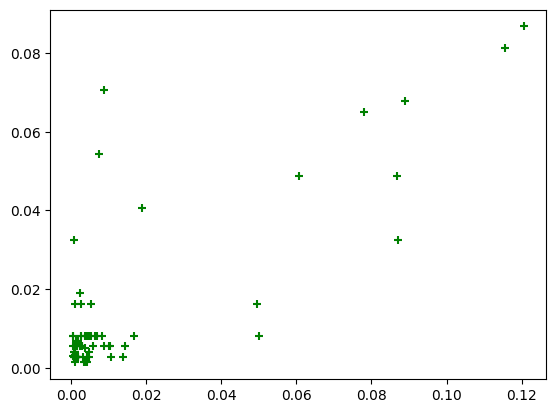

In [9]:
# Let's check the relationship between data usage and screen time.

plt.scatter(data['normalized_usage'], data['normalized_time'], marker = '+', color = 'g')

There is a cluster on the graph this means there is a kind of relationship between datausage and screen time
So let's uncover this reationship.

In [10]:
usage_per_month = data['normalized_usage'].groupby(data.Month).sum()

In [11]:
usage_per_app = data['normalized_usage'].groupby(data.Application).sum()

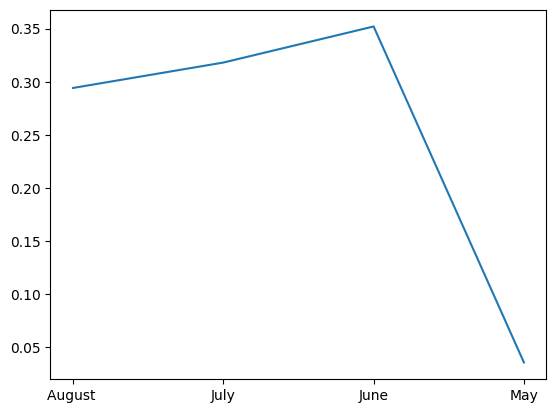

In [12]:
plt.plot(usage_per_month)

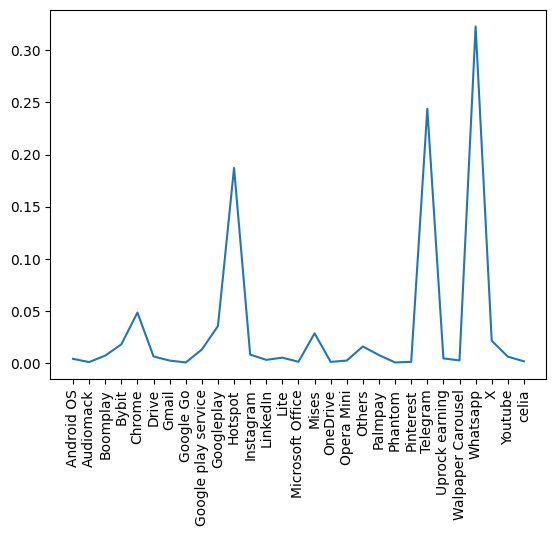

In [13]:
usage_per_app
plt.xticks(rotation = 'vertical')
plt.plot(usage_per_app)

### Let's check the relationship with respect to month

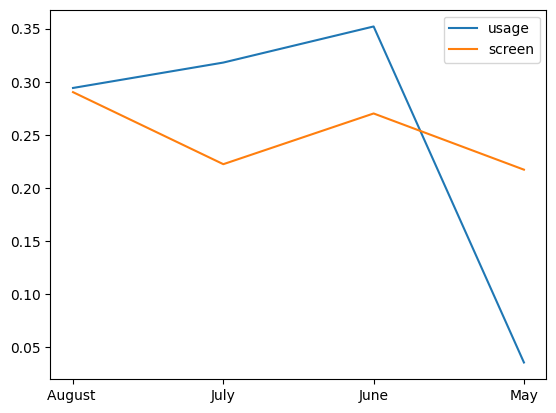

In [14]:
t = data.groupby('Month').sum()
plt.plot(t['normalized_usage'], label = t.index)
plt.plot(t['normalized_time'], label = t.index)
plt.legend(['usage' , 'screen'])

*There seem to be a direct relationship between the two variable*
- Usage is relatively low in May same as the screen time.
- In June as screen time increases usage also increased.
- In August both of them have almost same value.
## Let's check out their correlation to confirm a relationship

In [15]:
np.corrcoef(data["normalized_time"], data["normalized_usage"])

array([[1.        , 0.80385252],
       [0.80385252, 1.        ]])

In [16]:
data['Size'] = data['Size'] .apply(lambda a: a.lower())

In [17]:
pd.crosstab(data["Month"], data['Size'])

Size,big,medium,small
Month,,,
August,3,13,4
July,1,12,8
June,2,10,9
May,1,7,6


<BarContainer object of 3 artists>

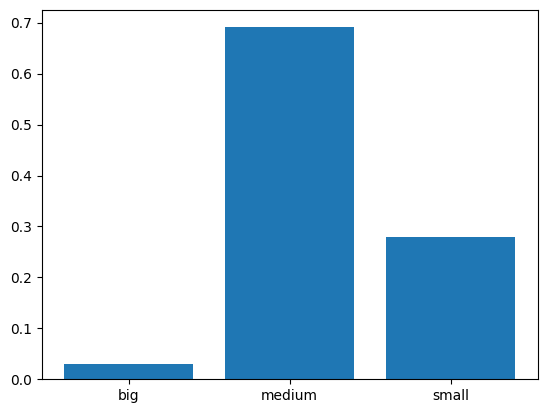

In [18]:
size = data.groupby('Size').sum()
plt.bar(size.index, size['normalized_usage'])

In [19]:
size.select_dtypes(include = ['Float64', 'Int64'])

,Data usage,Screen time,normalized_usage,normalized_time
Size,,,,
big,1711,145,0.029689,0.039327
medium,39820,2605,0.690960,0.706536
small,16099,937,0.279351,0.254136


In [20]:
size_count= data.Size.value_counts()
size_count

Size
medium    42
small     27
big        7
Name: count, dtype: int64

In [21]:
#  To remove the effect of frequency on usage let's compute their percentages.

size['new'] = size['normalized_usage'] / size_count
size['new_time'] = size['normalized_time'] / size_count 

<BarContainer object of 3 artists>

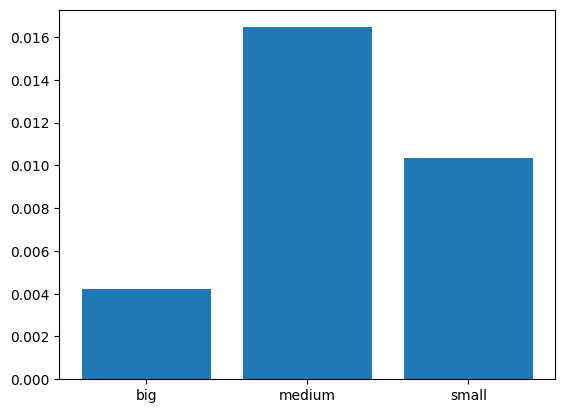

In [22]:
# Plot the bar chart
plt.bar(size.index, size['new'])

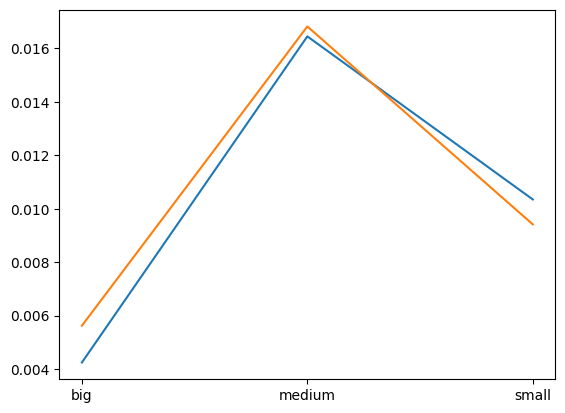

In [23]:
plt.plot(size.index, size['new'])
plt.plot(size['new_time'])

Most my data is consumed by applications with medium size they include:


In [24]:
data[(data.Size == 'medium')]['Application'].unique()

array(['Whatsapp', 'Telegram', 'Googleplay', 'X', 'Google play service',
       'Lite', 'Palmpay', 'Youtube', 'celia', 'OneDrive',
       'Walpaper Carousel', 'Opera Mini', 'Audiomack', 'Drive', 'Mises',
       'Boomplay', 'Android OS', 'LinkedIn', 'Chrome', 'Phantom'],
      dtype=object)

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

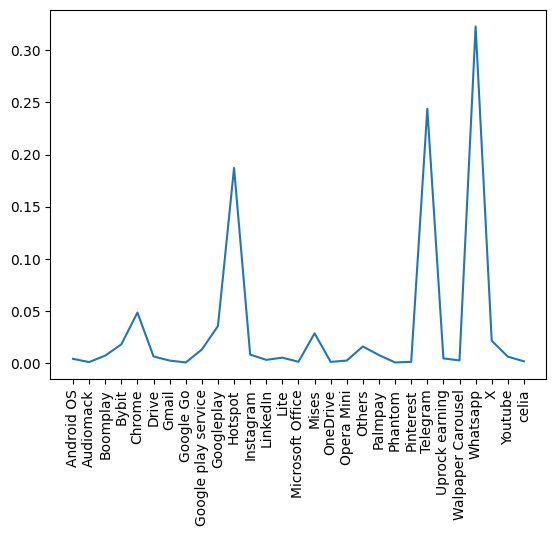

In [25]:
plt.xticks(rotation = 'vertical')
plt.plot(usage_per_app)
plt.plot

### The chart above has shown clearly that most of my data are consumed by medium sized applications
- Whatsapp
- Telegram
- Hotspot
- Chrome
- Mises
- Others

Are the top consumer according to the chart.

<BarContainer object of 76 artists>

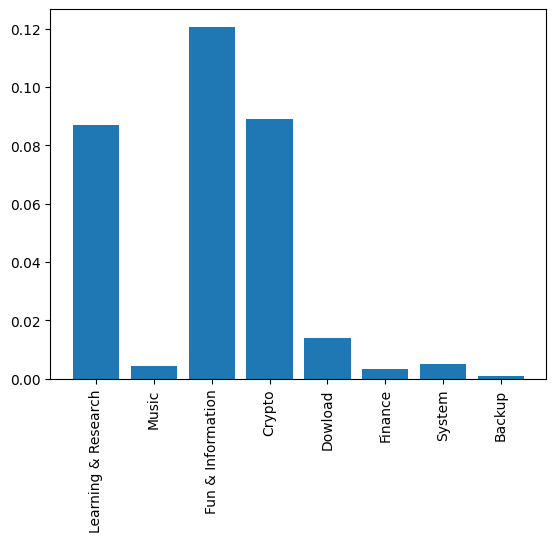

In [26]:
plt.xticks(rotation = "vertical")
plt.bar(data['Usage Type'], data['normalized_usage'])

### Most data is spent on fun, information, learning, research and crypto.
These applications include:

In [27]:
data[(data['Usage Type'] == 'Learning & Research') | (data['Usage Type'] == 'Fun & Information'
                                                     ) | (data['Usage Type'] == 'Crypto')]['Application'].unique()

array(['Hotspot', 'Whatsapp', 'Telegram', 'Chrome', 'Mises', 'X', 'Lite',
       'Youtube', 'celia', 'Bybit', 'Opera Mini', 'Drive', 'LinkedIn',
       'Instagram', 'Uprock earning', 'Microsoft Office', 'Pinterest',
       'Phantom', 'Google Go'], dtype=object)

<p> So applications that consumes data the most are applications that are medium in size and their usage type is either fun & information, reasearch & learning or crypto. They include: <p/>

In [28]:
answer = data[((data['Usage Type'] == 'Learning & Research') | (data['Usage Type'] == 'Fun & Information') | (data['Usage Type'] == 'Crypto') ) & (data['Size'] == 'medium')]
answer['Application'].unique()

array(['Whatsapp', 'Telegram', 'X', 'Lite', 'Youtube', 'celia',
       'Opera Mini', 'Drive', 'Mises', 'LinkedIn', 'Chrome', 'Phantom'],
      dtype=object)

# Solution:
- <p> Since high consumption is caused by high screen usage reducing the screen time is a good way to reduce data consumption. <p>
- Avoiding medium application which can be achieved be reducing fun time is also recommended to solve this data crisis.
- Most of all beware of whatsapp and telegram.